<a href="https://colab.research.google.com/github/Priyankakadam136/Stock-Trend-Prediction/blob/main/Stock_Trend_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data


In [ ]:
pip install yfinance

In [ ]:
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

In [ ]:
start = '2010-01-01'
end ='2020-12-31'

df = pdr.get_data_yahoo('TSLA', start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.553025,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.564354,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.459942,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.447997,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.490866,447610800


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-23,132.160004,132.429993,130.779999,130.960007,130.157608,88223700
2020-12-24,131.320007,133.460007,131.100006,131.970001,131.161407,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,135.852509,124486200
2020-12-29,138.050003,138.789993,134.339996,134.869995,134.043640,121047300
2020-12-30,135.580002,135.990005,133.399994,133.720001,132.900696,96452100


In [ ]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.553025,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.564354,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.459942,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.447997,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.490866,447610800


In [ ]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


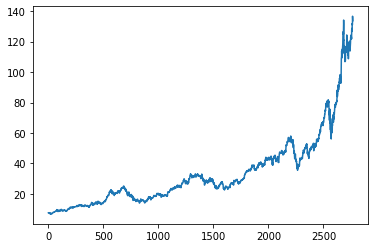

In [ ]:
plt.plot(df.Close)

In [ ]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2763,132.160004,132.429993,130.779999,130.960007,88223700
2764,131.320007,133.460007,131.100006,131.970001,54930100
2765,133.990005,137.339996,133.509995,136.690002,124486200
2766,138.050003,138.789993,134.339996,134.869995,121047300


In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763    118.000475
2764    118.223525
2765    118.489800
2766    118.699475
2767    118.925550
Name: Close, Length: 2768, dtype: float64

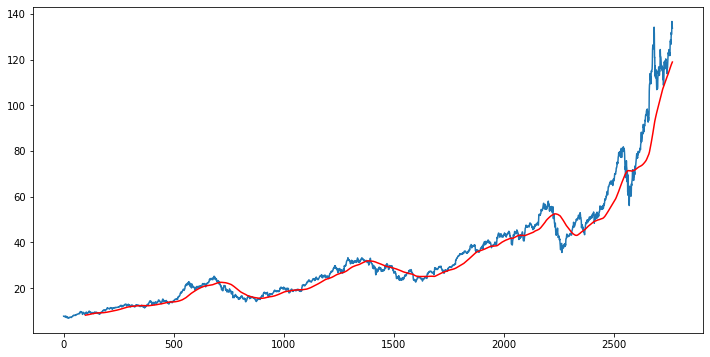

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')


In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763     98.809175
2764     99.158737
2765     99.494725
2766     99.866312
2767    100.218837
Name: Close, Length: 2768, dtype: float64

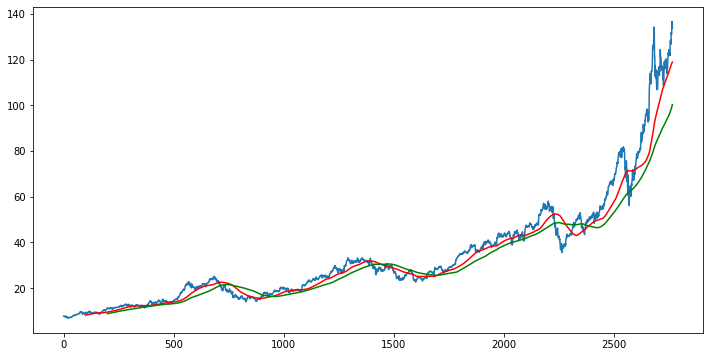

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
df.shape

(2768, 5)

 #Splitting Data into Traning and Testing

In [ ]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(1937, 1)
(831, 1)


In [ ]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [ ]:
data_testing.head()

,Close
1937,39.912498
1938,39.570000
1939,39.970001
1940,39.667500
1941,39.682499


LSTM Model


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02296349],
       [0.0233504 ],
       [0.01978458],
       ...,
       [0.96032627],
       [0.98133429],
       [0.97664957]])

In [ ]:
data_training_array.shape

(1937, 1)

In [ ]:
x_train =[]
y_train =[]

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train,y_train = np.array(x_train), np.array(y_train)
  

## #ML MODEL

In [ ]:
from keras.layers import Dense,Dropout , LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units= 50, activation = 'relu' , return_sequences= True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units= 60, activation = 'relu' , return_sequences= True,))
model.add(Dropout(0.3))



model.add(LSTM(units= 80, activation = 'relu' , return_sequences= True ))
model.add(Dropout(0.4))


model.add(LSTM(units= 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train,y_train, epochs = 50)

In [ ]:
model.save('keras_model.h5')

In [ ]:
data_testing.head()

,Close
1937,39.912498
1938,39.570000
1939,39.970001
1940,39.667500
1941,39.682499


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [ ]:
final_df.head()

,Close
0,35.567501
1,35.910000
2,36.132500
3,35.919998
4,35.947498


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[1.97745334e-04],
       [3.58404460e-03],
       [5.78390957e-03],
       [3.68289840e-03],
       [3.95479352e-03],
       [3.60874862e-03],
       [1.08510253e-02],
       [1.31497441e-02],
       [1.20374596e-02],
       [1.07274298e-02],
       [1.67338264e-02],
       [2.67444246e-02],
       [2.91667767e-02],
       [2.73623646e-02],
       [2.90678851e-02],
       [3.43821920e-02],
       [3.33934653e-02],
       [3.28249711e-02],
       [1.99223803e-02],
       [2.55826944e-02],
       [2.68680202e-02],
       [2.91667767e-02],
       [2.86971362e-02],
       [2.75601100e-02],
       [2.88701398e-02],
       [2.82274958e-02],
       [2.83757953e-02],
       [2.61264846e-02],
       [2.71646193e-02],
       [3.27755253e-02],
       [2.90184394e-02],
       [3.03037652e-02],
       [3.25777800e-02],
       [3.16385368e-02],
       [1.67832345e-02],
       [7.98377455e-03],
       [1.08757293e-02],
       [7.34113050e-03],
       [5.19067357e-03],
       [1.97745334e-04],


In [ ]:
input_data.shape

(931, 1)

In [ ]:
x_test = []
y_test =[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(831, 100, 1)
(831,)


## #Making Predictions

In [ ]:
y_predicted = model.predict(x_test)

In [ ]:
y_predicted.shape

(831, 1)

In [ ]:
y_test

In [ ]:
y_predicted

In [ ]:
scaler.scale_

array([0.00988704])

In [ ]:
scale_factor = 1/0.2099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

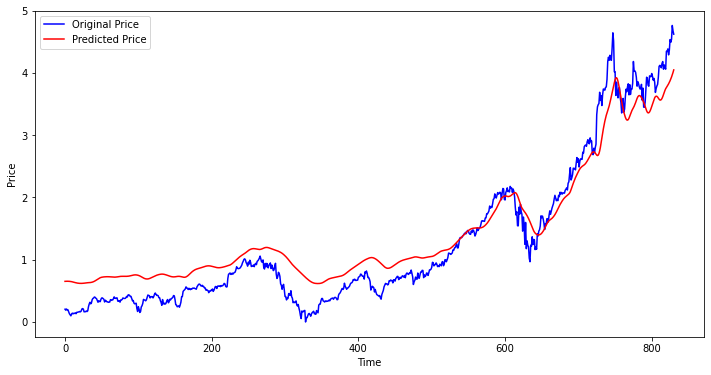

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label ='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()